# 一元线性回归（使用 nn模型）

Epoch[20/1000], loss:0.604347
Epoch[40/1000], loss:0.405424
Epoch[60/1000], loss:0.397768
Epoch[80/1000], loss:0.395288
Epoch[100/1000], loss:0.392970
Epoch[120/1000], loss:0.390680
Epoch[140/1000], loss:0.388413
Epoch[160/1000], loss:0.386170
Epoch[180/1000], loss:0.383949
Epoch[200/1000], loss:0.381751
Epoch[220/1000], loss:0.379575
Epoch[240/1000], loss:0.377422
Epoch[260/1000], loss:0.375291
Epoch[280/1000], loss:0.373181
Epoch[300/1000], loss:0.371094
Epoch[320/1000], loss:0.369027
Epoch[340/1000], loss:0.366981
Epoch[360/1000], loss:0.364957
Epoch[380/1000], loss:0.362953
Epoch[400/1000], loss:0.360970
Epoch[420/1000], loss:0.359007
Epoch[440/1000], loss:0.357064
Epoch[460/1000], loss:0.355140
Epoch[480/1000], loss:0.353237
Epoch[500/1000], loss:0.351353
Epoch[520/1000], loss:0.349488
Epoch[540/1000], loss:0.347642
Epoch[560/1000], loss:0.345816
Epoch[580/1000], loss:0.344007
Epoch[600/1000], loss:0.342218
Epoch[620/1000], loss:0.340446
Epoch[640/1000], loss:0.338693
Epoch[660/10

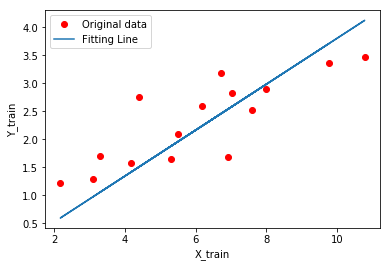

In [1]:
import torch as t
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn as nn

#准备训练集
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                  [9.779],[6.182],[7.59],[2.167],[7.042],
                  [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

# 将numpy.array 转换成 Tensor
x_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)

# 建立模型：线性模型 y = w*x + b

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)# input and output are both 1 dimension
        
    def forward(self, x):#上面定义方法，这步实现操纵
        out = self.linear(x)
        return out
    
if t.cuda.is_available():#由于下面会出现cuda()报错，所以这里禁用，即不适用GPU加速
#    model = LinearRegression().cuda()
#else:
    model = LinearRegression()

criterion = nn.MSELoss()# 定义损失函数
optimizer = t.optim.SGD(model.parameters(),lr=1e-3)# 定义优化函数

# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    if t.cuda.is_available():
    #    inputs = Variable(x_train).cuda()
    #    target = Variable(y_train).cuda()
    #else:
        inputs = Variable(x_train)
        target = Variable(y_train)
    
    # forward
    out = model(inputs)
    loss = criterion(out,target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #按一定间隔显示计算数值
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1,num_epochs,loss.item()))
        
# 预测一下结果
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.xlabel('X_train')# X的轴标
plt.ylabel('Y_train')# Y的轴标
plt.legend()# 显示图例 link 
plt.show()

# 手动实现一元线性回归（不使用 nn模型）

In [2]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

#准备训练集
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                  [9.779],[6.182],[7.59],[2.167],[7.042],
                  [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
# 转为 Tensor
x_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)
# 转为 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

# 定义 变量 w 和 b
w = Variable(t.randn(1), requires_grad = True)
b = Variable(t.zeros(1), requires_grad = True)
# print(w,'\n',b)

# 创建 一元回归模型
def linear_model(x):
    return x * w + b

# 定义误差函数
def get_loss(y_, y):
    return t.mean((y_ - y)**2)

loss.backward()
w.grad
b.grad

# 迭代中计算
for epoch in range(20):
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    n = 1e-2# 学习率
    # 计算梯度
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    # 更新数据
    w.data = w.data - n*w.grad.data
    b.data = b.data - n*b.grad.data
    
    print("epoch: {} , loss: {}".format(epoch, loss.item()))
    
    
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='original')
plt.plot(x_train.data.numpy(),y_.data.numpy(),'ro',label='predict')
plt.legend()
plt.show()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

# 手动多项式回归

In [11]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [12]:
# 定义一个多变量函数
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数
f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子
print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


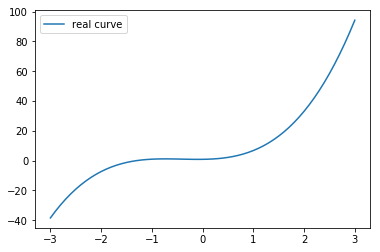

In [15]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3
plt.plot(x_sample, y_sample, label = 'real curve')
plt.legend()
plt.show()

In [20]:
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = t.from_numpy(x_train).float() # 转换成 float tensor
y_train = t.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor

# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)
# print(x_train,'\n',y_train)

In [22]:
# 定义参数和模型
w = Variable(t.randn(3, 1), requires_grad=True)
b = Variable(t.zeros(1), requires_grad=True)

def multi_linear(x):
    return t.mm(x, w) + b

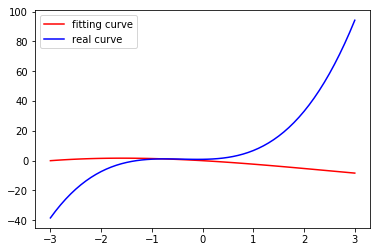

In [25]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()
plt.show()

In [29]:
# 计算误差，这里的误差和一元的线性模型的误差是相同的，前面已经定义过了 get_loss
def get_loss(y_, y):
    return t.mean((y_ - y)**2)

loss = get_loss(y_pred, y_train)
print(loss)

tensor(1071.4955)


In [30]:
# 自动求导
loss.backward()
# 查看一下 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([[ -96.0296],
        [-125.3768],
        [-621.3618]])
tensor([-23.2767])


In [31]:
# 更新一下参数
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data

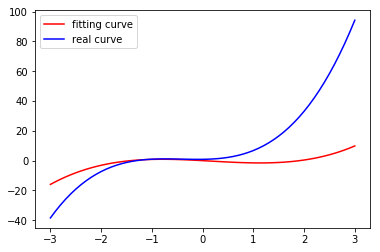

In [34]:
# 画出更新一次之后的模型
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()
plt.show()

In [35]:
# 进行 100 次参数更新
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.item()))

epoch 20, Loss: 55.16074
epoch 40, Loss: 14.34473
epoch 60, Loss: 4.76750
epoch 80, Loss: 2.47849
epoch 100, Loss: 1.89246


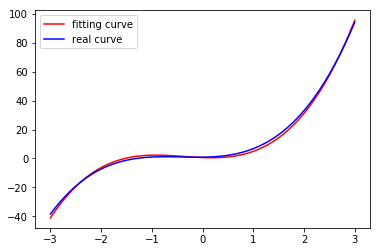

In [38]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()
plt.show()

# 多项式回归(使用模型)

In [1]:
# 想要拟合的方程
# y = b + w_1*x + w_2*x^2 + w_3*x^3

In [84]:
import torch as t
import numpy as np
from torch.autograd import Variable
import torch.nn as nn

In [85]:
#定义一个函数，将数据变成矩阵形式
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3]"""
    x = x.unsqueeze(1)
    return t.cat([x**i for i in range(1,4)], 1)#使用torch.cat()函数实现Tensor的拼接

In [86]:
# 定义好真实的函数
w_target = t.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)# unsqueeze的目的是什么
b_target = t.FloatTensor([0.9])

def f(x):
    """Approximated function."""
    return x.mm(w_target) + b_target[0]# x.mm(w_target)做矩阵乘法

In [88]:
# 进行训练时需要采样一些点，可以随机生成一些数，用作每次的训练集
def get_batch(batch_size = 32):
    """Build a batch i.e. (x,f(x)) pair."""
    random = t.randn(batch_size)# 获取32个元素的一位矩阵
    x = make_features(random)
    y = f(x)
    if t.cuda.is_available():
        return Variable(x).cuda(),Variable(y).cuda()
    else:
        return Variable(x),Variable(y)

#batch_x, batch_y = get_batch()
# print(batch_x)
# print(batch_y)

In [89]:
# 定义多项式模型
class poly_model(nn.Module):
    def __init__(self):
        # 下式等价于 nn.Module.__init__(self)
        super(poly_model, self).__init__()
        self.poly = nn.Linear(3,1)
        
    def forward(self, x):
        out = self.poly(x)
        return out

if t.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()
    
# batch_x, batch_y = get_batch()
# ty = model(batch_x)
# print(ty)

In [91]:
# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(), lr=1e-3)

In [92]:
# 同上，使用均方差来衡量模型的好坏，使用随机梯度下降来优化模型，然后开始训练模型
epoch = 0
while True:
    # Get data
    batch_x, batch_y = get_batch()
    # Forward pass
    output = model(batch_x)
    loss = criterion(output, batch_y)
    print_loss = loss.item()
    # Reset gradients
    optimizer.zero_grad()
    #Backward pass
    loss.backward()
    # updata parameters
    optimizer.step()
    epoch += 1
    if print_loss < 1e-3:
        print("Loss: {}".format(print_loss))
        break

Loss: 0.0009720628149807453


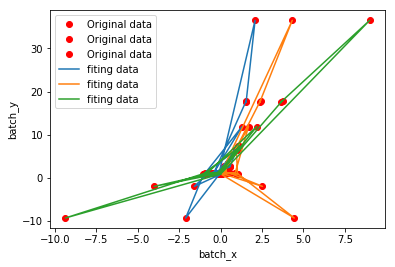

In [96]:
import matplotlib.pyplot as plt
# 预测一下结果
model.eval()
predict = model(Variable(batch_x))
predict = predict.data.cpu().numpy()

plt.plot(batch_x.cpu().numpy(), batch_y.cpu().numpy(),'ro', label='Original data')
plt.plot(batch_x.cpu().numpy(), predict, label='fiting data')

plt.xlabel('batch_x')# X的轴标
plt.ylabel('batch_y')# Y的轴标
plt.legend()# 显示图例 link 
plt.show()

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


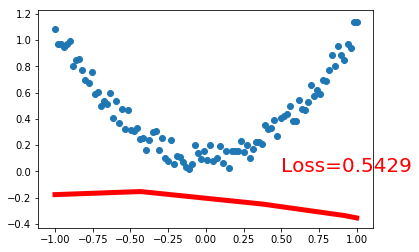

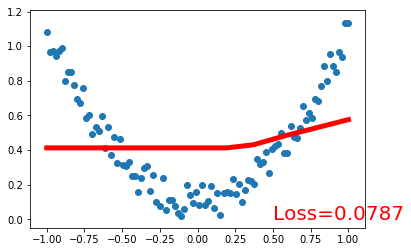

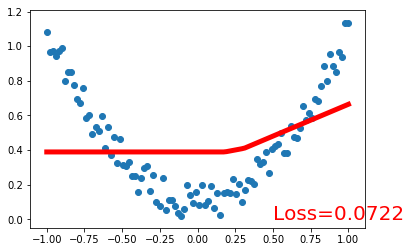

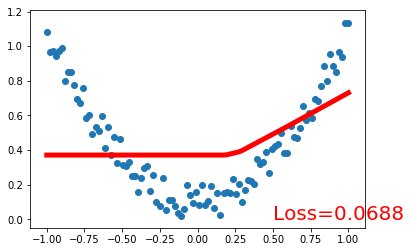

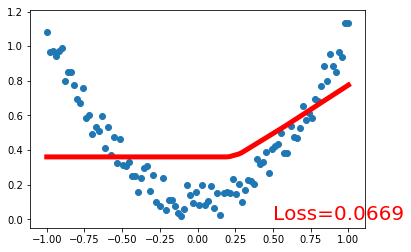

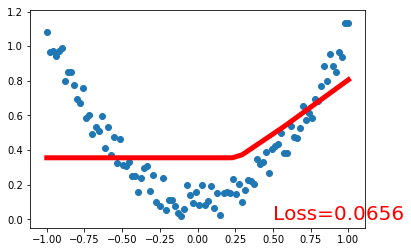

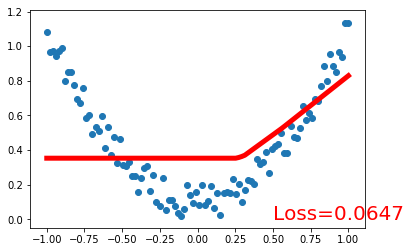

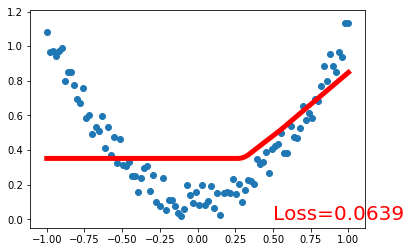

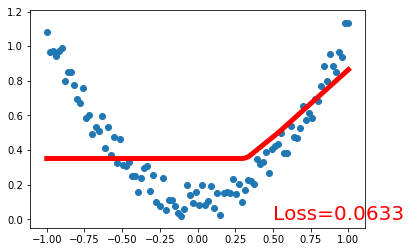

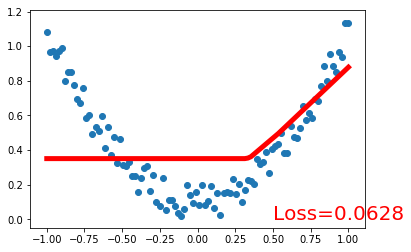

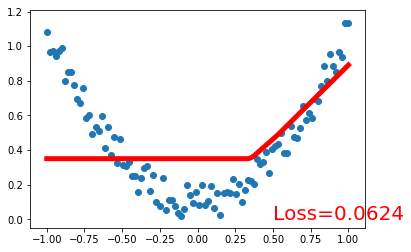

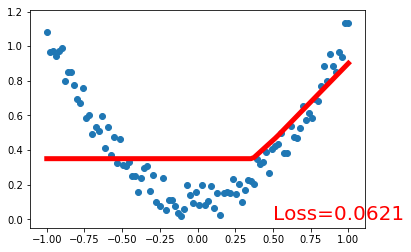

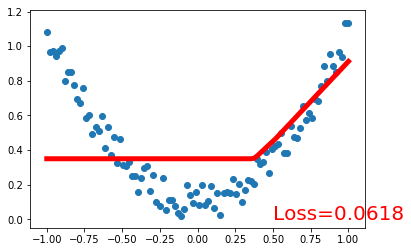

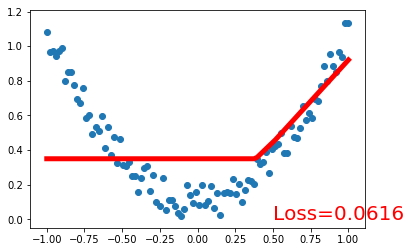

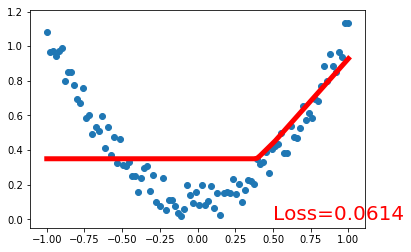

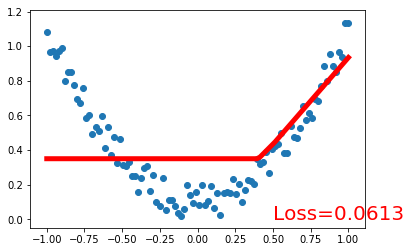

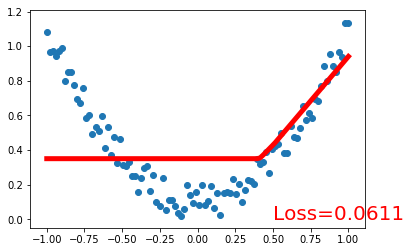

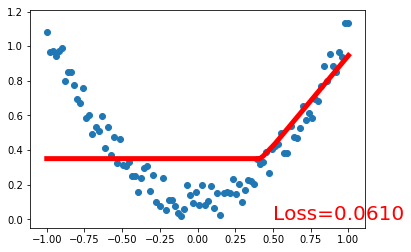

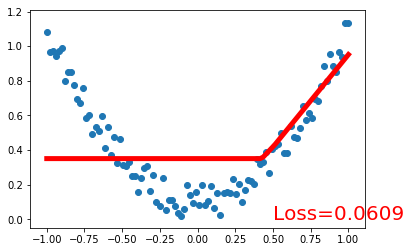

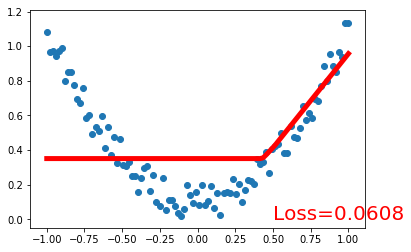

In [1]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.1.11
matplotlib
"""
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.item(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()